### Superbowl 2023 analysis

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import nfl_data_py as nfl #nfl api

#### Importing, saving as csv and loading the data

In [2]:
pbp = nfl.import_pbp_data([2022]) # we only need this nfl season information
#looking data
pbp.head()

2022 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0,0
1,43.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,None,None,NaN,None,NaN,47969;53059;42500;46279;53575;48364;46253;5460...,00-0036157;00-0035202;00-0037984;00-0029597;00...,00-0035537;00-0032134;00-0034419;00-0036500;00...,11,11
2,68.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
3,89.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"3 DL, 4 LB, 4 DB",4.0,53536;43586;42371;53443;42500;44999;43433;3309...,00-0036924;00-0032466;00-0032234;00-0036979;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
4,115.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11


In [3]:
#Selecting only columns we need and saving it as csv
pbp[["play_type", "posteam", "rushing_yards", "rusher_id", "rusher_player_id", "rusher_player_name",
        "ydstogo", "down", "yardline_100", "run_location", "score_differential", "game_seconds_remaining"
        ]].to_csv("pbp_2022.csv", index = False)

In [4]:
#load play_by_play data
pbp = pd.read_csv("pbp_2022.csv")
#peak at head of pbp data
pbp.head()

,play_type,posteam,rushing_yards,rusher_id,rusher_player_id,rusher_player_name,ydstogo,down,yardline_100,run_location,score_differential,game_seconds_remaining
0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3600.0
1,kickoff,NYJ,NaN,NaN,NaN,NaN,0.0,NaN,35.0,NaN,0.0,3600.0
2,run,NYJ,19.0,00-0036924,00-0036924,Mi.Carter,10.0,1.0,78.0,left,0.0,3596.0
3,pass,NYJ,NaN,NaN,NaN,NaN,10.0,1.0,59.0,NaN,0.0,3569.0
4,run,NYJ,5.0,00-0036924,00-0036924,Mi.Carter,10.0,2.0,59.0,left,0.0,3565.0


#### Filtering data

Filtering data only with "run" type of play and removing nulls from rushing yards and rusher id, also we need to reset the index


In [5]:
# filtering data 
pbp_run = pbp.query("play_type == 'run' & rushing_yards.notnull() & rusher_id.notnull()").reset_index()
#peak at head of data
pbp_run.head()

,index,play_type,posteam,rushing_yards,rusher_id,rusher_player_id,rusher_player_name,ydstogo,down,yardline_100,run_location,score_differential,game_seconds_remaining
0,2,run,NYJ,19.0,00-0036924,00-0036924,Mi.Carter,10.0,1.0,78.0,left,0.0,3596.0
1,4,run,NYJ,5.0,00-0036924,00-0036924,Mi.Carter,10.0,2.0,59.0,left,0.0,3565.0
2,9,run,BAL,4.0,00-0034796,00-0034796,L.Jackson,2.0,3.0,64.0,right,0.0,3461.0
3,10,run,BAL,0.0,00-0033118,00-0033118,K.Drake,10.0,1.0,60.0,right,0.0,3421.0
4,12,run,BAL,1.0,00-0033118,00-0033118,K.Drake,2.0,3.0,52.0,right,0.0,3340.0


#### Who are the best rusher in sunday's game
which players will be in the game on Sunday who are the best at rushing  

In [6]:
#create a list only with the teams of the super bowl
sb_teams =["KC", "PHI"]

#Filtering the pdp_run data frame
pbp_run_sb = pbp_run.loc[pbp_run["posteam"].isin(sb_teams)]

Checking if the posteam column has only the two teams need it with unique()

In [7]:
pbp_run_sb.posteam.unique()

array(['KC', 'PHI'], dtype=object)

Let's fun; aggregate over the whole season for each player's rushing yards(sum of rushing_yards).

We need to group by posteam(to know wich team the player belongs to) also by rusher_player_id and rusher_player_name because some players have the same name

In [8]:
pbp_run_sb_yards = pbp_run_sb.groupby(["posteam", "rusher_player_id", "rusher_player_name"]).agg({
    "rushing_yards": ["sum", "mean", "count"]})
pbp_run_sb_yards

rushing_yards                 
                                                      sum       mean count
posteam rusher_player_id rusher_player_name                               
KC      00-0030506       T.Kelce                      5.0   2.500000     2
        00-0031376       J.McKinnon                 317.0   3.643678    87
        00-0031595       M.Burton                     7.0   1.400000     5
        00-0033873       P.Mahomes                   20.0   3.333333     6
        00-0034272       M.Valdes-Scantling          -3.0  -3.000000     1
        00-0034816       R.Jones                     70.0   3.888889    18
        00-0035140       M.Hardman                   38.0   6.333333     6
        00-0036360       C.Edwards-Helaire          302.0   4.253521    71
        00-0036637       N.Gray                       1.0   0.500000     2
        00-0036913       K.Toney                     73.0  12.166667     6
        00-0037197       I.Pacheco                  951.0   4.953125   192
        00-0038090       S.Moore                     27.0   6.750000     4
PHI     00-0033251       Z.Pascal                     0.0   0.000000     1
        00-0034414       B.Scott                    270.0   4.090909    66
        00-0035243       M.Sanders                 1401.0   4.881533   287
        00-0035289       G.Minshew                    1.0   0.333333     3
        00-0036271       Q.Watkins                    1.0   0.333333     3
        00-0036389       J.Hurts                    521.0   4.378151   119
        00-0036919       K.Gainwell                 400.0   5.063291    79
        00-0036984       T.Sermon                    19.0   9.500000     2

Filter only players with more than 20 rushing plays and sorting with to see who had the most yards

In [9]:
pbp_run_sb_yards.loc[pbp_run_sb_yards[("rushing_yards", "count")] > 20].sort_values(("rushing_yards", "sum"), ascending = False)

rushing_yards                
                                                      sum      mean count
posteam rusher_player_id rusher_player_name                              
PHI     00-0035243       M.Sanders                 1401.0  4.881533   287
KC      00-0037197       I.Pacheco                  951.0  4.953125   192
PHI     00-0036389       J.Hurts                    521.0  4.378151   119
        00-0036919       K.Gainwell                 400.0  5.063291    79
KC      00-0031376       J.McKinnon                 317.0  3.643678    87
        00-0036360       C.Edwards-Helaire          302.0  4.253521    71
PHI     00-0034414       B.Scott                    270.0  4.090909    66

Fun facts;

The leading rusher for the chiefs is Isiah Pachecho who is a seventh-round pick in the most-recent NFL draft out of the Rutgers


The Eagles' two leading rushers are their starting running back Miles Sanders and their quarterback Jalen Hurts. This is just a subset of Hurts' overall rushing performance, since he often "scrambles" on passing plays, wich count as rushing yards even thoughthe are the result of passing plays.

#### Rushing yards over expected; building linear model

The winning solution to the 2020 Big Data Bowl an analytics competition held by the NFL each year, resulted in the construction of an expectation metric for rushing yardage that depended on a number of factor. From there, one can look at the residual between actual outcome an expected outcome - called rushing yards over expected (RYOE) for more insight into how well the rusher did realtive to expectations.

Here we fit a simple linear model bases only on the number of yards to go for a fisrt down. Generally speaking, defenses play closes to the line of scrimmage when there are fewer yards to go, making rushing yardage harder to gain the closer yards to go gets 0.

In [10]:
#using smf.ols function with rushing_yards predicted by and intercept and yards to go
yards_to_go = smf.ols("rushing_yards ~ 1 + ydstogo", data =  pbp_run)

In [11]:
#extract fit and then print the summary
yards_to_go.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          rushing_yards   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     96.54
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.03e-22
Time:                        20:03:43   Log-Likelihood:                -45653.
No. Observations:               13995   AIC:                         9.131e+04
Df Residuals:                   13993   BIC:                         9.132e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3463      0.122     27.340      0.000       3.106       3.586
ydstogo        0.1382      0.014      9.826      0.000       0.111       0.166
==============================================================================
Omnibus:                    11912.471   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           478413.579
Skew:                           3.924   Prob(JB):                         0.00
Kurtosis:                      30.547   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that the coefficient fot ydstogo is positive - a rusher is expected to gain more yards the further his team is from the first down market. Let's explore the outcome of this model


In [27]:
#create a ryoe column in pbp_run from the resid of yard_to_go_fit().resid
pbp_run_sb["ryoe"] = yards_to_go.fit().resid
pbp_run_sb.head()

C:\Users\Yira Yareth\AppData\Local\Temp\ipykernel_19220\2267557235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp_run_sb["ryoe"] = yards_to_go.fit().resid


,index,play_type,posteam,rushing_yards,rusher_id,rusher_player_id,rusher_player_name,ydstogo,down,yardline_100,run_location,score_differential,game_seconds_remaining,ryoe
303,1266,run,KC,9.0,00-0036360,00-0036360,C.Edwards-Helaire,10.0,1.0,75.0,middle,0.0,3600.0,4.271583
304,1268,run,KC,7.0,00-0036360,00-0036360,C.Edwards-Helaire,10.0,1.0,65.0,middle,0.0,3532.0,2.271583
305,1269,run,KC,18.0,00-0036360,00-0036360,C.Edwards-Helaire,3.0,2.0,58.0,left,0.0,3495.0,14.239070
306,1273,run,KC,0.0,00-0036360,00-0036360,C.Edwards-Helaire,7.0,2.0,27.0,middle,0.0,3371.0,-4.313780
308,1283,run,KC,3.0,00-0036360,00-0036360,C.Edwards-Helaire,10.0,1.0,86.0,right,7.0,3163.0,-1.728417


#### RYOE for Super Bowl Rushers

You will need to filter only the two teams in the super bowl

In [28]:
#filter out sb teams to create pbp_ryoe_sb
pbp_ryoe_sb = pbp_run_sb.loc[pbp_run_sb["posteam"].isin(sb_teams)].reset_index()
pbp_ryoe_sb.head()

,level_0,index,play_type,posteam,rushing_yards,rusher_id,rusher_player_id,rusher_player_name,ydstogo,down,yardline_100,run_location,score_differential,game_seconds_remaining,ryoe
0,303,1266,run,KC,9.0,00-0036360,00-0036360,C.Edwards-Helaire,10.0,1.0,75.0,middle,0.0,3600.0,4.271583
1,304,1268,run,KC,7.0,00-0036360,00-0036360,C.Edwards-Helaire,10.0,1.0,65.0,middle,0.0,3532.0,2.271583
2,305,1269,run,KC,18.0,00-0036360,00-0036360,C.Edwards-Helaire,3.0,2.0,58.0,left,0.0,3495.0,14.239070
3,306,1273,run,KC,0.0,00-0036360,00-0036360,C.Edwards-Helaire,7.0,2.0,27.0,middle,0.0,3371.0,-4.313780
4,308,1283,run,KC,3.0,00-0036360,00-0036360,C.Edwards-Helaire,10.0,1.0,86.0,right,7.0,3163.0,-1.728417


Next, use the same grouping used before to calculate each player's rushing yards (sum of rushing_yards), yards-per-carry(mean of rushing yards), total rushing yards over expected (TYOE, sum of RYOE) and average RYOE (mean of RYOE)

In [29]:
pbp_run_sb_yards = pbp_run_sb.groupby(["posteam", "rusher_player_id", "rusher_player_name"]).agg({
    "rushing_yards": ["sum", "mean"], "ryoe" : ["sum", "mean", "count"]})

pbp_run_sb_yards

rushing_yards             \
                                                      sum       mean   
posteam rusher_player_id rusher_player_name                            
KC      00-0030506       T.Kelce                      5.0   2.500000   
        00-0031376       J.McKinnon                 317.0   3.643678   
        00-0031595       M.Burton                     7.0   1.400000   
        00-0033873       P.Mahomes                   20.0   3.333333   
        00-0034272       M.Valdes-Scantling          -3.0  -3.000000   
        00-0034816       R.Jones                     70.0   3.888889   
        00-0035140       M.Hardman                   38.0   6.333333   
        00-0036360       C.Edwards-Helaire          302.0   4.253521   
        00-0036637       N.Gray                       1.0   0.500000   
        00-0036913       K.Toney                     73.0  12.166667   
        00-0037197       I.Pacheco                  951.0   4.953125   
        00-0038090       S.Moore                     27.0   6.750000   
PHI     00-0033251       Z.Pascal                     0.0   0.000000   
        00-0034414       B.Scott                    270.0   4.090909   
        00-0035243       M.Sanders                 1401.0   4.881533   
        00-0035289       G.Minshew                    1.0   0.333333   
        00-0036271       Q.Watkins                    1.0   0.333333   
        00-0036389       J.Hurts                    521.0   4.378151   
        00-0036919       K.Gainwell                 400.0   5.063291   
        00-0036984       T.Sermon                    19.0   9.500000   

                                                   ryoe                  
                                                    sum      mean count  
posteam rusher_player_id rusher_player_name                              
KC      00-0030506       T.Kelce              -3.074711 -1.537355     2  
        00-0031376       J.McKinnon          -72.258332 -0.830556    87  
        00-0031595       M.Burton            -10.422528 -2.084506     5  
        00-0033873       P.Mahomes            -7.126593 -1.187766     6  
        00-0034272       M.Valdes-Scantling   -7.728417 -7.728417     1  
        00-0034816       R.Jones              -9.583017 -0.532390    18  
        00-0035140       M.Hardman            14.466930  2.411155     6  
        00-0036360       C.Edwards-Helaire    -9.115828 -0.128392    71  
        00-0036637       N.Gray               -5.969011 -2.984506     2  
        00-0036913       K.Toney              47.531956  7.921993     6  
        00-0037197       I.Pacheco            95.526355  0.497533   192  
        00-0038090       S.Moore              10.021304  2.505326     4  
PHI     00-0033251       Z.Pascal             -3.484506 -3.484506     1  
        00-0034414       B.Scott             -21.758326 -0.329672    66  
        00-0035243       M.Sanders           127.009855  0.442543   287  
        00-0035289       G.Minshew           -10.697429 -3.565810     3  
        00-0036271       Q.Watkins           -11.941341 -3.980447     3  
        00-0036389       J.Hurts              29.635937  0.249041   119  
        00-0036919       K.Gainwell           60.317066  0.763507    79  
        00-0036984       T.Sermon             10.372440  5.186220     2

Let's look at the play level distributions of thse players of guys with more than 20 carries during the course of the season.

We used the value 20 because we only want player who had a large number of players: First, clean up the column name to be easit to work with

In [31]:
#first flatten the columns of pbp_ryoe_sb_yards
pbp_run_sb_yards.columns = list(map("".join,pbp_run_sb_yards.columns.values))


rushing_yardssum  \
posteam rusher_player_id rusher_player_name                     
KC      00-0030506       T.Kelce                          5.0   
        00-0031376       J.McKinnon                     317.0   
        00-0031595       M.Burton                         7.0   
        00-0033873       P.Mahomes                       20.0   
        00-0034272       M.Valdes-Scantling              -3.0   
        00-0034816       R.Jones                         70.0   
        00-0035140       M.Hardman                       38.0   
        00-0036360       C.Edwards-Helaire              302.0   
        00-0036637       N.Gray                           1.0   
        00-0036913       K.Toney                         73.0   
        00-0037197       I.Pacheco                      951.0   
        00-0038090       S.Moore                         27.0   
PHI     00-0033251       Z.Pascal                         0.0   
        00-0034414       B.Scott                        270.0   
        00-0035243       M.Sanders                     1401.0   
        00-0035289       G.Minshew                        1.0   
        00-0036271       Q.Watkins                        1.0   
        00-0036389       J.Hurts                        521.0   
        00-0036919       K.Gainwell                     400.0   
        00-0036984       T.Sermon                        19.0   

                                             rushing_yardsmean     ryoesum  \
posteam rusher_player_id rusher_player_name                                  
KC      00-0030506       T.Kelce                      2.500000   -3.074711   
        00-0031376       J.McKinnon                   3.643678  -72.258332   
        00-0031595       M.Burton                     1.400000  -10.422528   
        00-0033873       P.Mahomes                    3.333333   -7.126593   
        00-0034272       M.Valdes-Scantling          -3.000000   -7.728417   
        00-0034816       R.Jones                      3.888889   -9.583017   
        00-0035140       M.Hardman                    6.333333   14.466930   
        00-0036360       C.Edwards-Helaire            4.253521   -9.115828   
        00-0036637       N.Gray                       0.500000   -5.969011   
        00-0036913       K.Toney                     12.166667   47.531956   
        00-0037197       I.Pacheco                    4.953125   95.526355   
        00-0038090       S.Moore                      6.750000   10.021304   
PHI     00-0033251       Z.Pascal                     0.000000   -3.484506   
        00-0034414       B.Scott                      4.090909  -21.758326   
        00-0035243       M.Sanders                    4.881533  127.009855   
        00-0035289       G.Minshew                    0.333333  -10.697429   
        00-0036271       Q.Watkins                    0.333333  -11.941341   
        00-0036389       J.Hurts                      4.378151   29.635937   
        00-0036919       K.Gainwell                   5.063291   60.317066   
        00-0036984       T.Sermon                     9.500000   10.372440   

                                             ryoemean  ryoecount  
posteam rusher_player_id rusher_player_name                       
KC      00-0030506       T.Kelce            -1.537355          2  
        00-0031376       J.McKinnon         -0.830556         87  
        00-0031595       M.Burton           -2.084506          5  
        00-0033873       P.Mahomes          -1.187766          6  
        00-0034272       M.Valdes-Scantling -7.728417          1  
        00-0034816       R.Jones            -0.532390         18  
        00-0035140       M.Hardman           2.411155          6  
        00-0036360       C.Edwards-Helaire  -0.128392         71  
        00-0036637       N.Gray             -2.984506          2  
        00-0036913       K.Toney             7.921993          6  
        00-0037197       I.Pacheco           0.497533        192  
        00-0038090       S

In [32]:
#then rename columns
pbp_run_sb_yards.rename(
    {
    "rushing_yardssum" : "total rushing yards",
    "rushing_yardsmean" : "yards per play",
    "ryoesum" : "TYOE",
    "ryoecount" : "carries"
    }, axis = 1, inplace = True
)

In [34]:
#query for carries >= 20
pbp_run_sb_yards_20 = pbp_run_sb_yards.query("carries >= 20").reset_index()

,posteam,rusher_player_id,rusher_player_name,total rushing yards,yards per play,TYOE,ryoemean,carries
0,KC,00-0031376,J.McKinnon,317.0,3.643678,-72.258332,-0.830556,87
1,KC,00-0036360,C.Edwards-Helaire,302.0,4.253521,-9.115828,-0.128392,71
2,KC,00-0037197,I.Pacheco,951.0,4.953125,95.526355,0.497533,192
3,PHI,00-0034414,B.Scott,270.0,4.090909,-21.758326,-0.329672,66
4,PHI,00-0035243,M.Sanders,1401.0,4.881533,127.009855,0.442543,287
5,PHI,00-0036389,J.Hurts,521.0,4.378151,29.635937,0.249041,119
6,PHI,00-0036919,K.Gainwell,400.0,5.063291,60.317066,0.763507,79


In [35]:
#sort values by TYOE by ascending
pbp_run_sb_yards_20.sort_values("TYOE", ascending=False)

,posteam,rusher_player_id,rusher_player_name,total rushing yards,yards per play,TYOE,ryoemean,carries
4,PHI,00-0035243,M.Sanders,1401.0,4.881533,127.009855,0.442543,287
2,KC,00-0037197,I.Pacheco,951.0,4.953125,95.526355,0.497533,192
6,PHI,00-0036919,K.Gainwell,400.0,5.063291,60.317066,0.763507,79
5,PHI,00-0036389,J.Hurts,521.0,4.378151,29.635937,0.249041,119
1,KC,00-0036360,C.Edwards-Helaire,302.0,4.253521,-9.115828,-0.128392,71
3,PHI,00-0034414,B.Scott,270.0,4.090909,-21.758326,-0.329672,66
0,KC,00-0031376,J.McKinnon,317.0,3.643678,-72.258332,-0.830556,87


Notice that while Pacheco was close to Sander in terms of yards per carry and trailed him in total rushing, he is pretty close to him in total RYOE and is much better than he is in avarage RYOE per carry

Now, extract the top players for the superbowl

In [39]:
#filter out only players with more than 20 carries
pbp_run_sb_20 = pbp_ryoe_sb.loc[pbp_ryoe_sb["rusher_player_id"].isin(pbp_run_sb_yards_20.rusher_player_id.unique())]
pbp_run_sb_20


,level_0,index,play_type,posteam,rushing_yards,rusher_id,rusher_player_id,rusher_player_name,ydstogo,down,yardline_100,run_location,score_differential,game_seconds_remaining,ryoe
0,303,1266,run,KC,9.0,00-0036360,00-0036360,C.Edwards-Helaire,10.0,1.0,75.0,middle,0.0,3600.0,4.271583
1,304,1268,run,KC,7.0,00-0036360,00-0036360,C.Edwards-Helaire,10.0,1.0,65.0,middle,0.0,3532.0,2.271583
2,305,1269,run,KC,18.0,00-0036360,00-0036360,C.Edwards-Helaire,3.0,2.0,58.0,left,0.0,3495.0,14.239070
3,306,1273,run,KC,0.0,00-0036360,00-0036360,C.Edwards-Helaire,7.0,2.0,27.0,middle,0.0,3371.0,-4.313780
4,308,1283,run,KC,3.0,00-0036360,00-0036360,C.Edwards-Helaire,10.0,1.0,86.0,right,7.0,3163.0,-1.728417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,13988,49954,run,PHI,-2.0,00-0036919,00-0036919,K.Gainwell,7.0,3.0,11.0,right,21.0,369.0,-6.313780
956,13991,49961,run,PHI,5.0,00-0034414,00-0034414,B.Scott,10.0,1.0,31.0,left,24.0,245.0,0.271583
957,13992,49962,run,PHI,-1.0,00-0034414,00-0034414,B.Scott,5.0,2.0,26.0,left,24.0,198.0,-5.037355
958,13993,49963,run,PHI,4.0,00-0034414,00-0034414,B.Scott,6.0,3.0,27.0,middle,24.0,153.0,-0.175568


Use seaborn boxplot for each player:

<AxesSubplot: xlabel='ryoe', ylabel='rusher_player_name'>

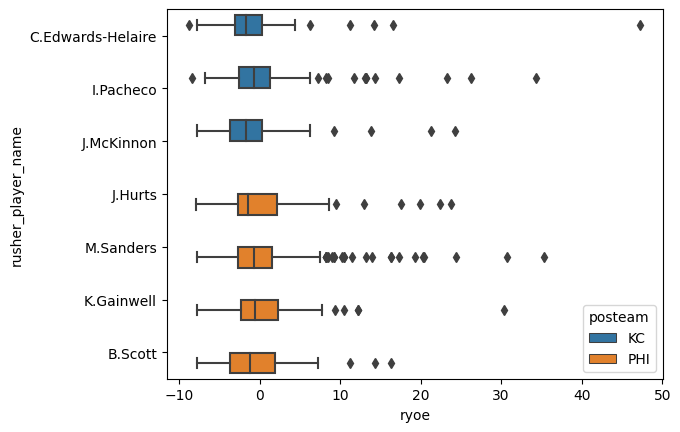

In [40]:
#use sns boxplot
sns.boxplot(x = "ryoe", y = "rusher_player_name", hue = "posteam", data = pbp_run_sb_20)

Notice that while Jerick McKinnnon has scored 9 touchdowns for the chiefs this year, he's actually struggled running the ball relative to expectatios pre-snap. Former first-round pick Clude Edwards-Helaire has ails well with a negative RYOE, which opened the door for seventh-round pick Pachecho to shine

 - Rushing yards over expected is right skewed
 - Sander and Pacheco have shined, while Scott, Edwards-Helaire and Mckinnon have strugled
 - Much of data science even with package data still requires data wrangling